<a href="https://colab.research.google.com/github/rsonar821/Adult-ML-Model/blob/main/Adults.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, auc, roc_auc_score, classification_report

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Innomatics/EDA 2 (Adult)/adult.csv')

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.shape

(48842, 15)

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [ ]:
df.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [ ]:
df = df.replace('?', np.nan)

In [ ]:
df['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [ ]:
df['income'].value_counts()

<=50K    37155
>50K     11687
Name: income, dtype: int64

In [ ]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

In [ ]:
df.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [ ]:
columns=['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income']
for i in columns:
  print(f'Unique values of {i} are \n \n {df[i].unique()}')
  print('*'*150)

Unique values of age are 
 
 [25 38 28 44 18 34 29 63 24 55 65 36 26 58 48 43 20 37 40 72 45 22 23 54
 32 46 56 17 39 52 21 42 33 30 47 41 19 69 50 31 59 49 51 27 57 61 64 79
 73 53 77 80 62 35 68 66 75 60 67 71 70 90 81 74 78 82 83 85 76 84 89 88
 87 86]
******************************************************************************************************************************************************
Unique values of workclass are 
 
 ['Private' 'Local-gov' nan 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
******************************************************************************************************************************************************
Unique values of fnlwgt are 
 
 [226802  89814 336951 ... 129912 255835 257302]
******************************************************************************************************************************************************
Unique values of education are 
 
 ['11th' 'HS-grad' 'Asso

In [ ]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)
df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)

In [ ]:
df.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [ ]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [ ]:
def continuous_analysis(col_name):
  fig = sns.boxplot(df[col_name])
  fig.set_title(f'Boxplot of {col_name}')
  plt.show(fig)
  print('-'*150)

  df[col_name].plot.density(color='blue')
  plt.title(f'Probability Density Plot of {col_name}')
  plt.show()
  print('-'*150)

  fig = sns.distplot(df[col_name])
  fig.set_title(f'Distribution Plot of {col_name}')
  plt.show(fig)
  print('-'*150)

  q3 = df[col_name].quantile(0.75)  
  q1 = df[col_name].quantile(0.25)  
  IQR = q3 - q1
  lower_limit = q1 - (IQR * 1.5)
  upper_limit = q3 + (IQR * 1.5)
  df[col_name] = np.where(df[col_name]> upper_limit, upper_limit, np.where(df[col_name]< lower_limit, lower_limit,df[col_name]))

  fig = sns.boxplot(df[col_name])
  fig.set_title(f'Boxplot of {col_name} after capping outliers')
  plt.show(fig)
  print('-'*150)

  df[col_name].plot.density(color='blue')
  plt.title(f'Probability Density Plot of {col_name} after capping outliers')
  plt.show()
  print('-'*150)

  fig = sns.distplot(df[col_name])
  fig.set_title(f'Distribution Plot of {col_name} after capping outliers')
  plt.show(fig)
  print('-'*150)

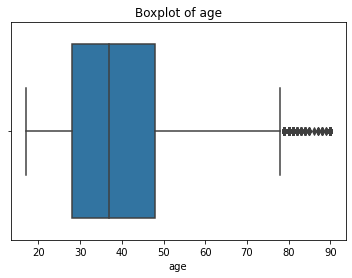

------------------------------------------------------------------------------------------------------------------------------------------------------


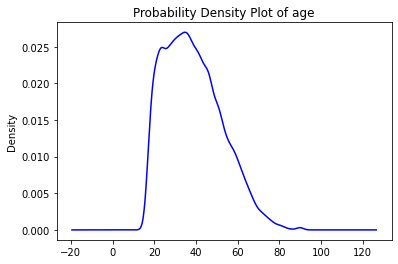

------------------------------------------------------------------------------------------------------------------------------------------------------


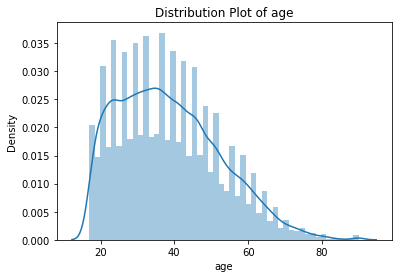

------------------------------------------------------------------------------------------------------------------------------------------------------


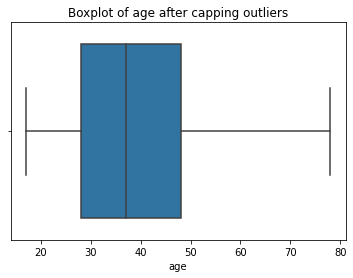

------------------------------------------------------------------------------------------------------------------------------------------------------


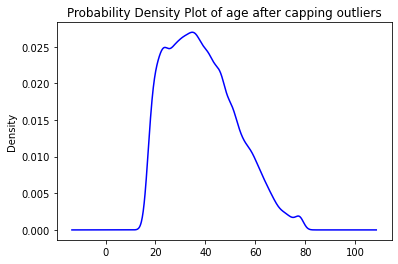

------------------------------------------------------------------------------------------------------------------------------------------------------


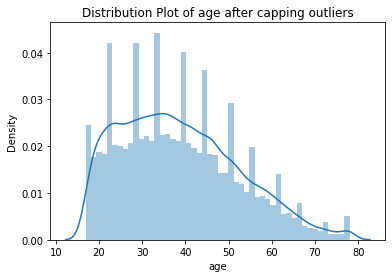

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
continuous_analysis('age')

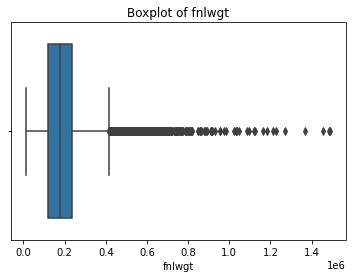

------------------------------------------------------------------------------------------------------------------------------------------------------


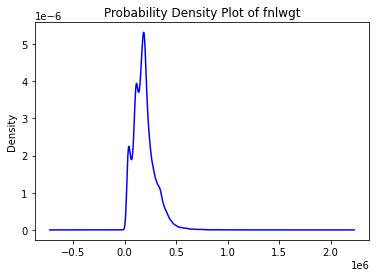

------------------------------------------------------------------------------------------------------------------------------------------------------


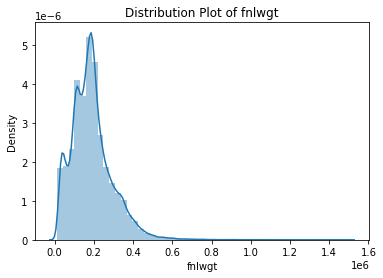

------------------------------------------------------------------------------------------------------------------------------------------------------


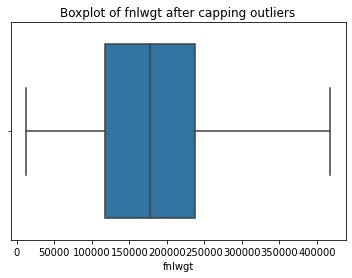

------------------------------------------------------------------------------------------------------------------------------------------------------


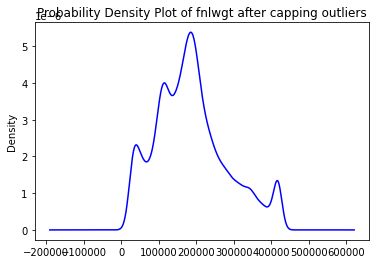

------------------------------------------------------------------------------------------------------------------------------------------------------


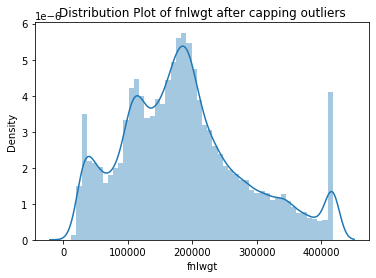

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
continuous_analysis('fnlwgt')

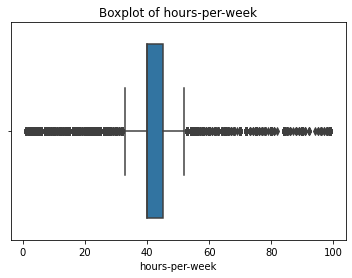

------------------------------------------------------------------------------------------------------------------------------------------------------


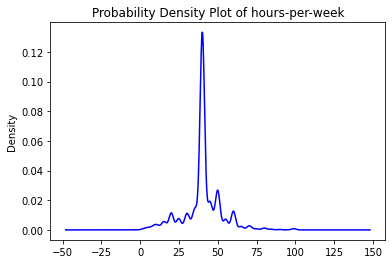

------------------------------------------------------------------------------------------------------------------------------------------------------


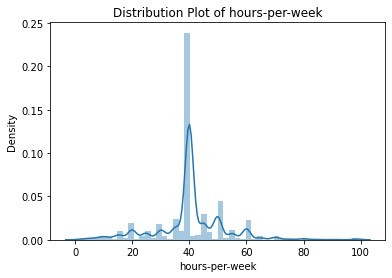

------------------------------------------------------------------------------------------------------------------------------------------------------


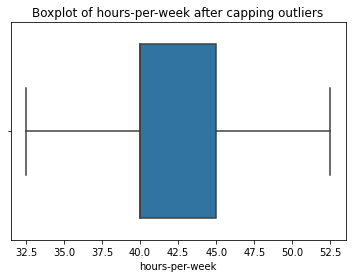

------------------------------------------------------------------------------------------------------------------------------------------------------


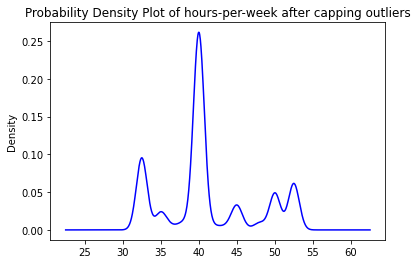

------------------------------------------------------------------------------------------------------------------------------------------------------


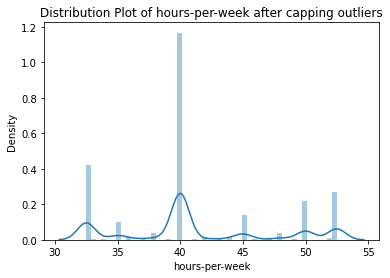

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
continuous_analysis('hours-per-week')

In [ ]:
df['capital-gain'].value_counts()

0        44807
15024      513
7688       410
7298       364
99999      244
         ...  
1111         1
7262         1
22040        1
1639         1
2387         1
Name: capital-gain, Length: 123, dtype: int64

In [ ]:
df['capital-loss'].value_counts()

0       46560
1902      304
1977      253
1887      233
2415       72
        ...  
2465        1
2080        1
155         1
1911        1
2201        1
Name: capital-loss, Length: 99, dtype: int64

**Maximum capital gains and capital losses are 0, so outlier capping can't be done**

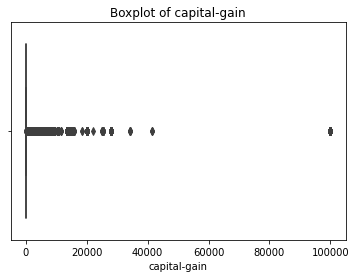

------------------------------------------------------------------------------------------------------------------------------------------------------


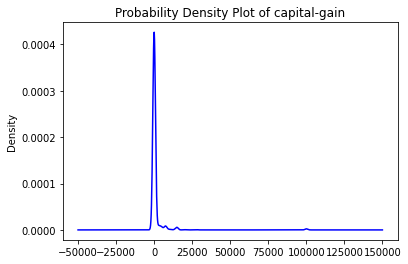

------------------------------------------------------------------------------------------------------------------------------------------------------


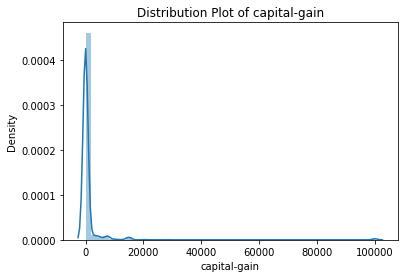

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
fig = sns.boxplot(df['capital-gain'])
fig.set_title(f'Boxplot of capital-gain')
plt.show(fig)
print('-'*150)

df['capital-gain'].plot.density(color='blue')
plt.title(f'Probability Density Plot of capital-gain')
plt.show()
print('-'*150)

fig = sns.distplot(df['capital-gain'])
fig.set_title(f'Distribution Plot of capital-gain')
plt.show(fig)
print('-'*150)

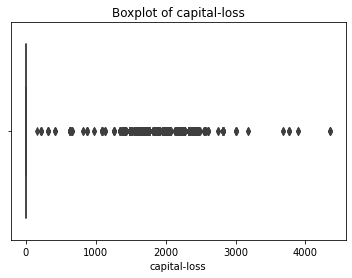

------------------------------------------------------------------------------------------------------------------------------------------------------


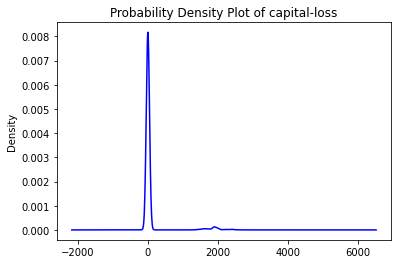

------------------------------------------------------------------------------------------------------------------------------------------------------


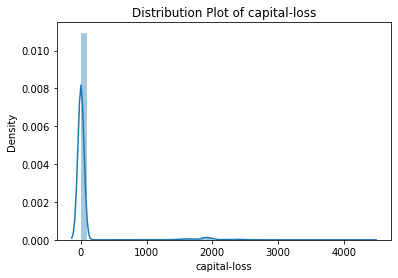

------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
fig = sns.boxplot(df['capital-loss'])
fig.set_title(f'Boxplot of capital-loss')
plt.show(fig)
print('-'*150)

df['capital-loss'].plot.density(color='blue')
plt.title(f'Probability Density Plot of capital-loss')
plt.show()
print('-'*150)

fig = sns.distplot(df['capital-loss'])
fig.set_title(f'Distribution Plot of capital-loss')
plt.show(fig)
print('-'*150)

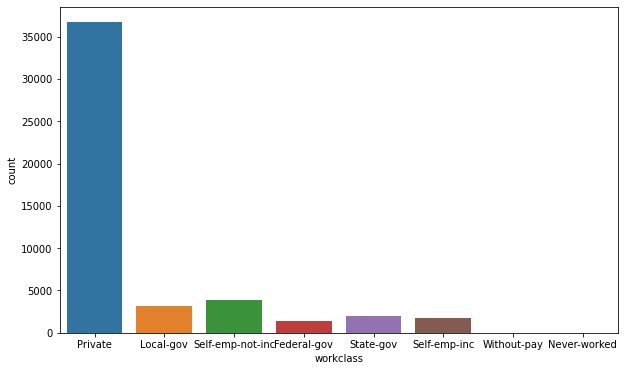

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['workclass'])

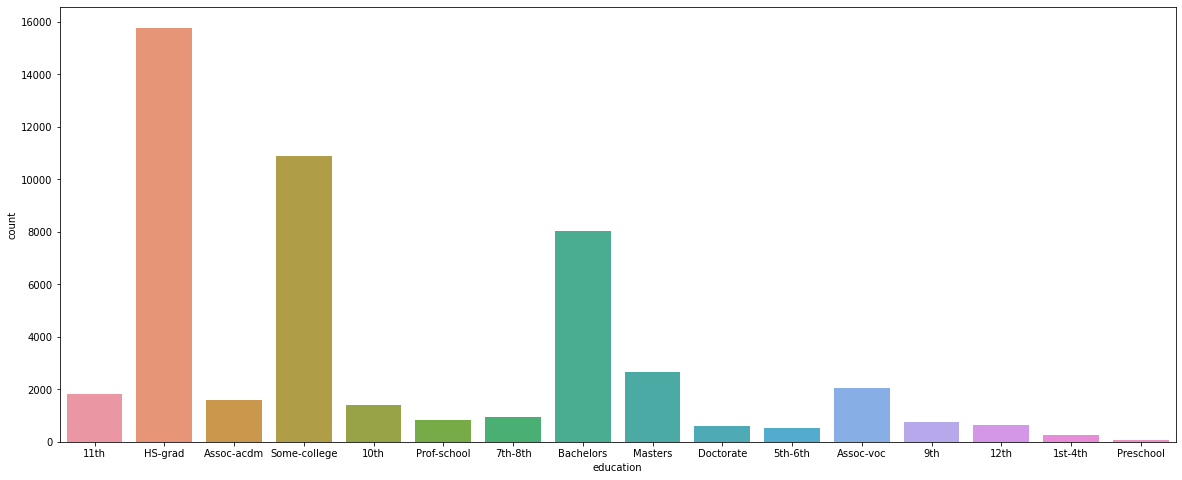

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['education'])

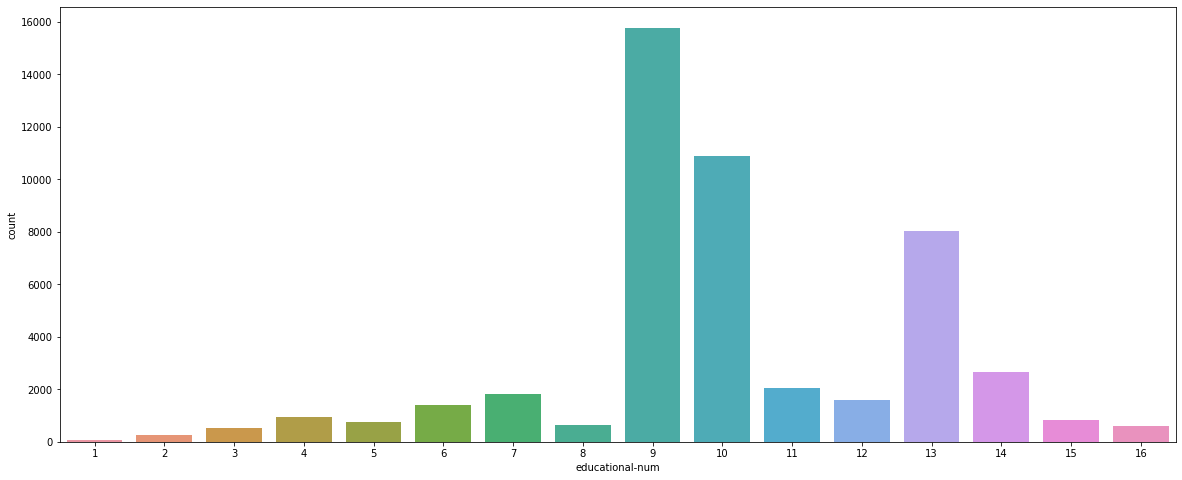

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['educational-num'])

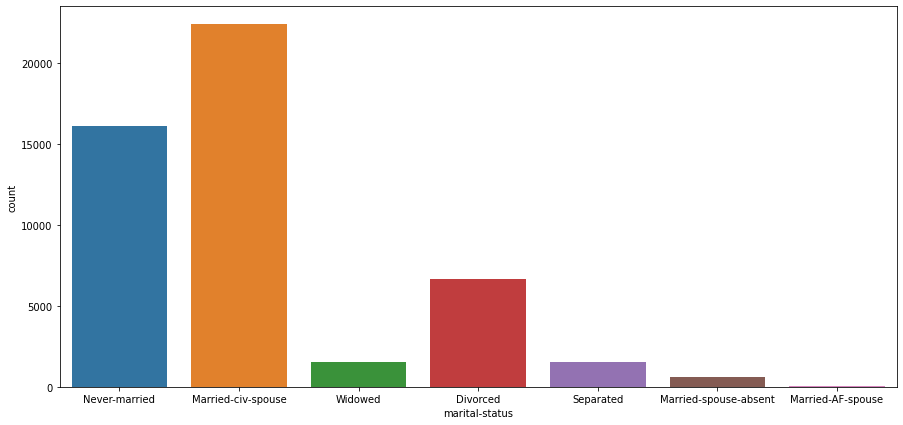

In [ ]:
plt.figure(figsize=(15,7))
sns.countplot(df['marital-status'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

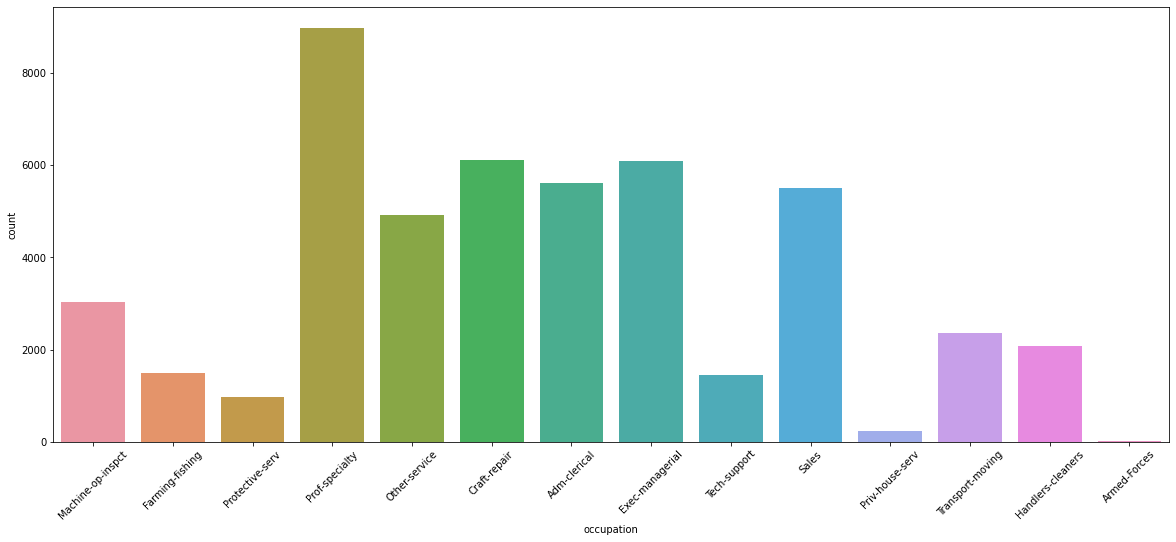

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['occupation'])
plt.xticks(rotation=45)

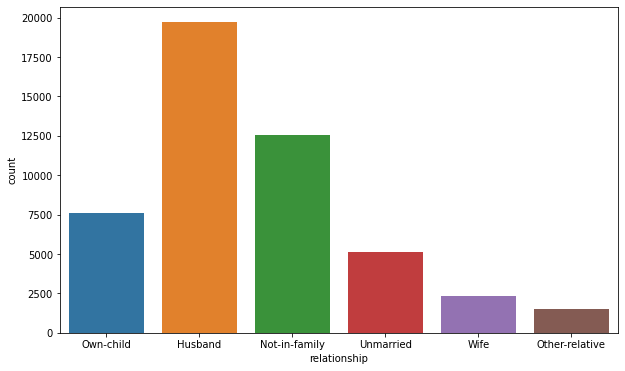

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['relationship'])

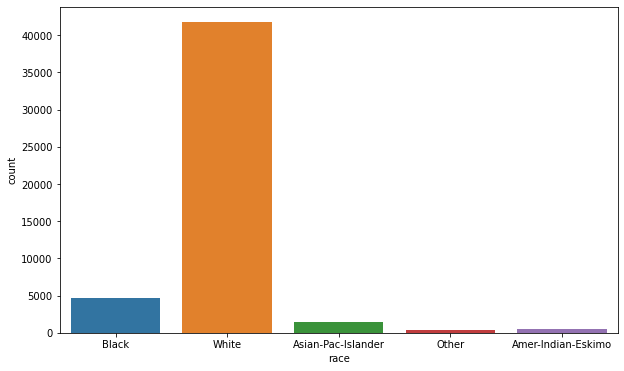

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['race'])

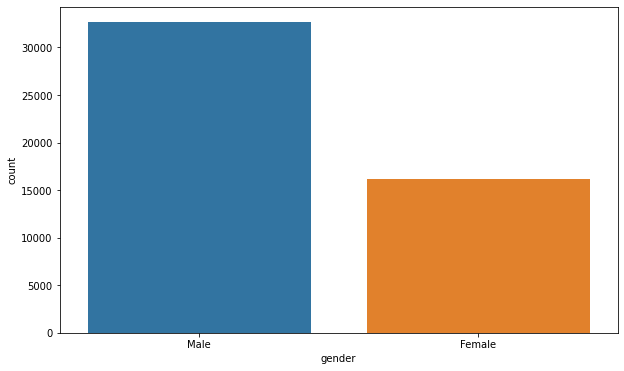

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['gender'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40]),
 <a list of 41 Text major ticklabel objects>)

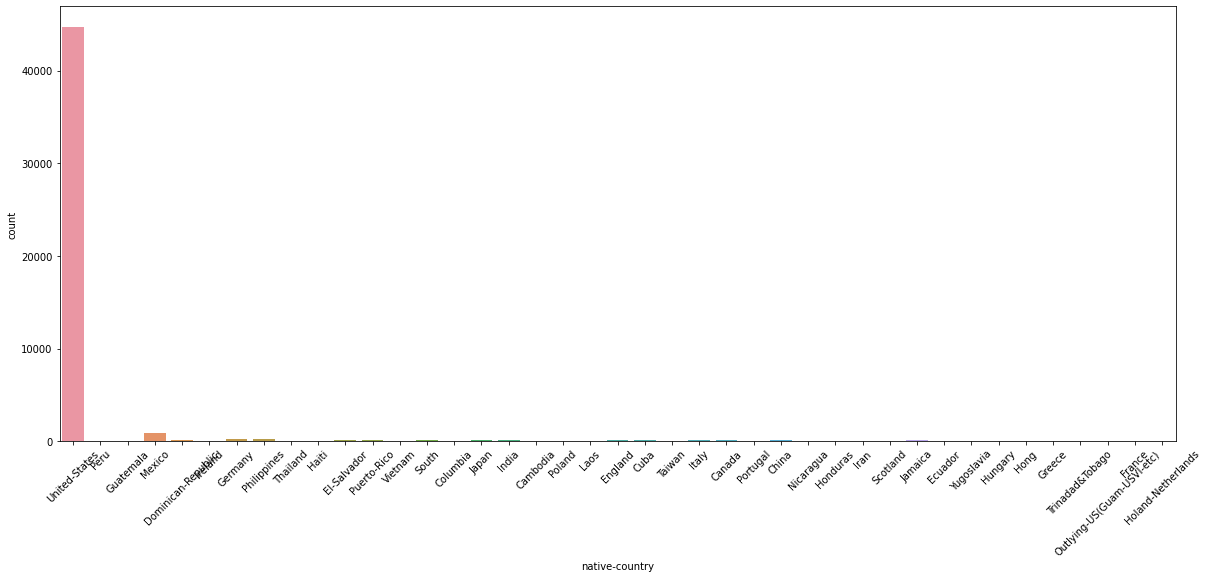

In [ ]:
plt.figure(figsize=(20,8))
sns.countplot(df['native-country'])
plt.xticks(rotation=45)

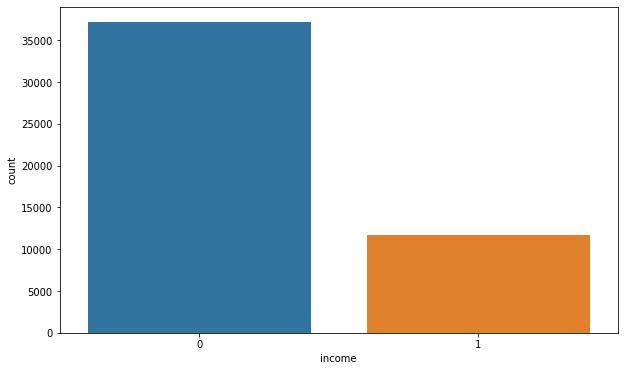

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['income'])

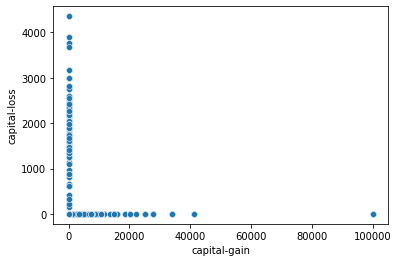

In [ ]:
sns.scatterplot(x='capital-gain', y='capital-loss', data=df)

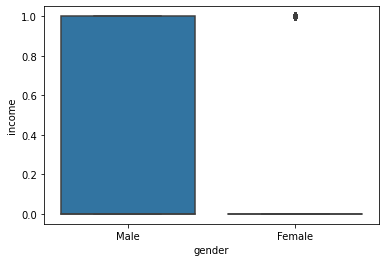

In [ ]:
sns.boxplot(x='gender', y='income', data=df)

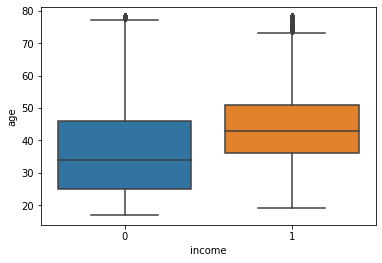

In [ ]:
sns.boxplot(x='income', y='age', data=df)

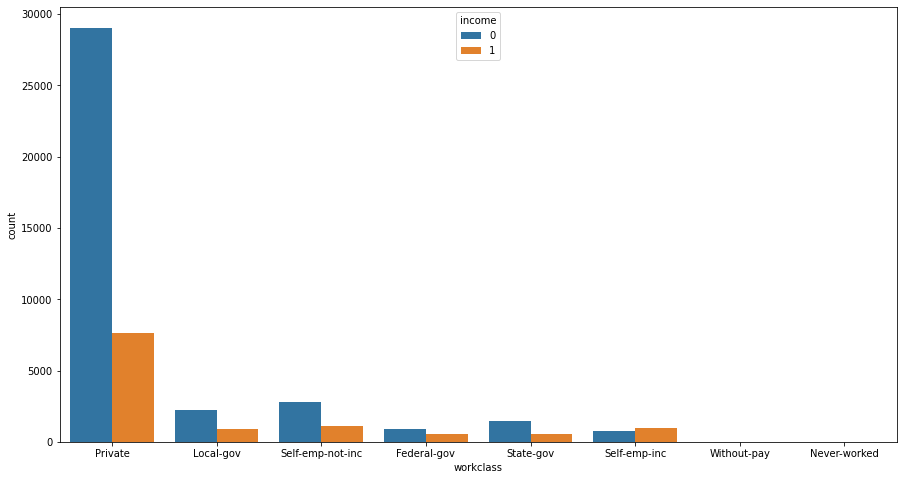

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x='workclass', hue ='income', data=df)

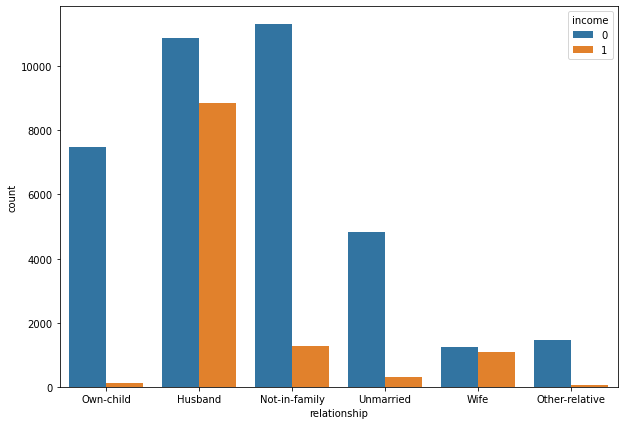

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income", data=df)

<Figure size 1440x360 with 0 Axes>

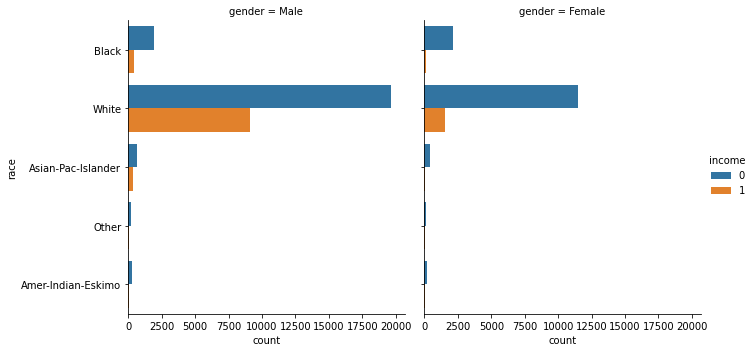

In [ ]:
plt.figure(figsize=(20,5))
sns.catplot(y="race", hue="income", kind="count", col="gender", data=df)

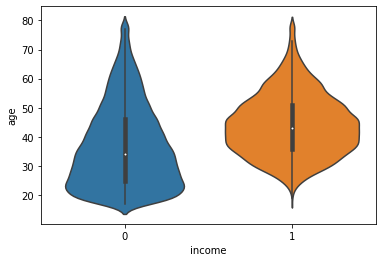

In [ ]:
sns.violinplot(x="income", y="age", data=df)

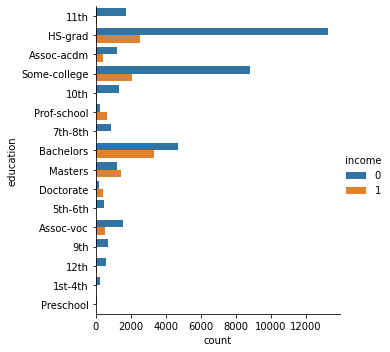

In [ ]:
sns.catplot(y="education", hue="income", kind="count", data=df)

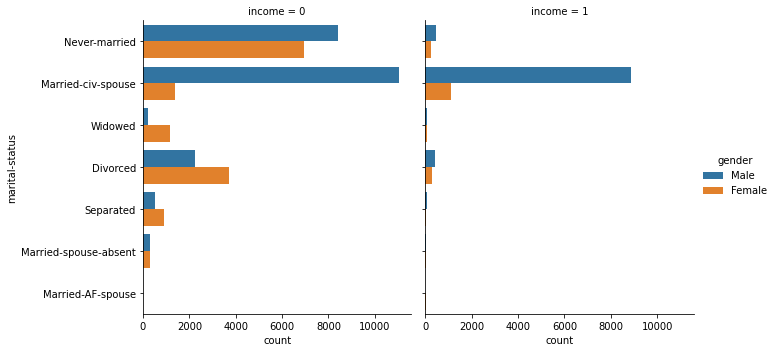

In [ ]:
sns.catplot(y='marital-status', hue='gender', col='income', data=df, kind='count')

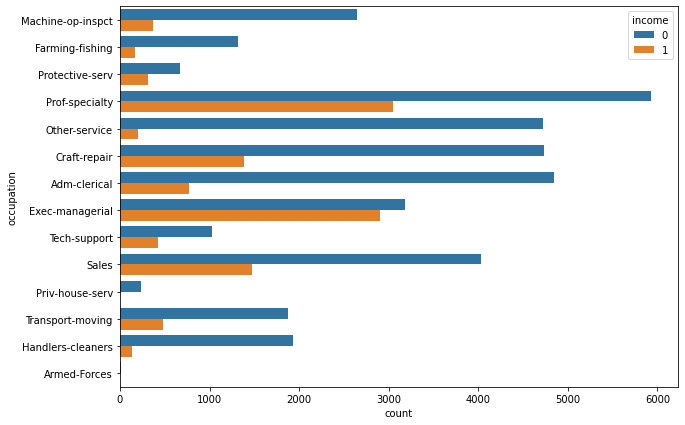

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(y="occupation", hue="income", data=df)

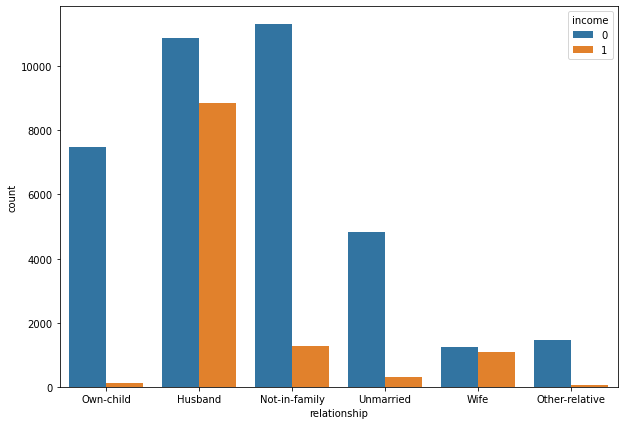

In [ ]:
plt.figure(figsize=(10,7))
sns.countplot(x="relationship", hue="income", data=df)

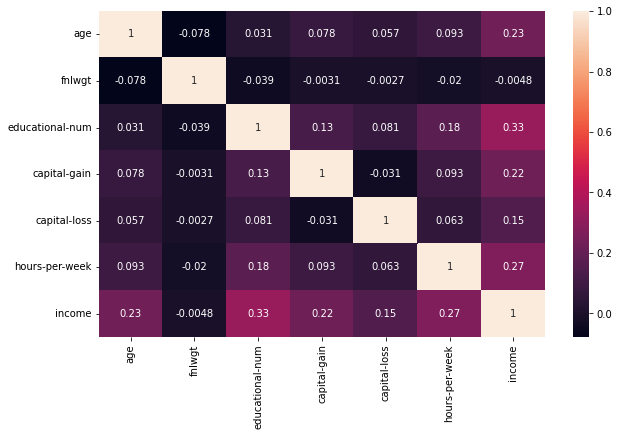

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True)

In [ ]:
df = pd.get_dummies(df, columns=['workclass', 'education', 'marital-status',
                                 'occupation', 'relationship', 'race', 'gender',
                                 'native-country'], drop_first=True)

In [ ]:
X = df.drop('income', axis=1)
Y = df['income']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
models=[]
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))
models.append(('XGB Classifier', XGBClassifier()))

In [ ]:
scores = {}
for name, model in models:
  score = np.mean(cross_val_score(model, X_train, Y_train, cv=3, scoring='roc_auc'))
  scores[name] = score

In [ ]:
scores

{'Logistic Regression': 0.9047521259896047,
 'Decision Tree Classifier': 0.7477377255826259,
 'Random Forest Classifier': 0.9002410100775756,
 'Gradient Boosting Classifier': 0.9203573460742138,
 'XGB Classifier': 0.9197517446036608}

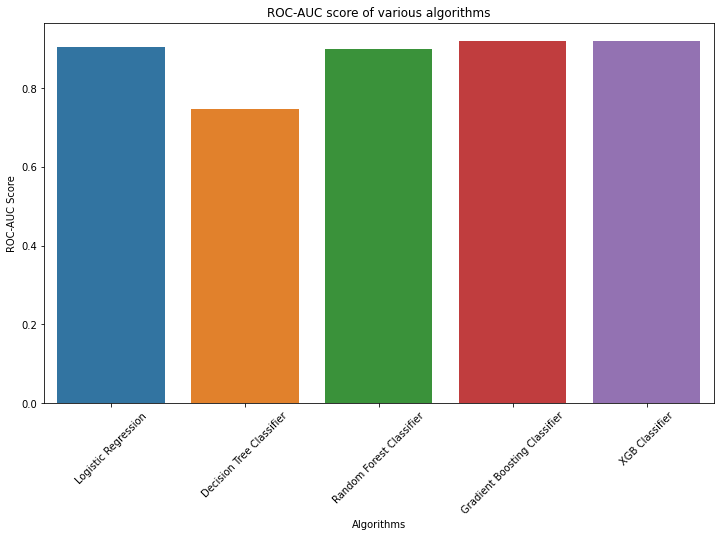

In [ ]:
plt.figure(figsize=(12,7))
figure = sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.xticks(rotation=45)
figure.set(title='ROC-AUC score of various algorithms')
figure.set(xlabel='Algorithms', ylabel='ROC-AUC Score')
plt.show(figure)

In [ ]:
rfc = RandomForestClassifier()
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 50)]
max_depth = [int(x) for x in np.linspace(10, 100, num = 20)]
min_samples_split = range(2, 6)
min_samples_leaf = range(2, 6)
  
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [ ]:
rfc_random = RandomizedSearchCV(estimator=rfc, param_distributions = random_grid, cv=3, verbose=2, scoring='roc_auc')
rfc_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END max_depth=71, min_samples_leaf=2, min_samples_split=4, n_estimators=885; total time=  29.2s
[CV] END max_depth=71, min_samples_leaf=2, min_samples_split=4, n_estimators=885; total time=  26.4s
[CV] END max_depth=71, min_samples_leaf=2, min_samples_split=4, n_estimators=885; total time=  29.0s
[CV] END max_depth=85, min_samples_leaf=5, min_samples_split=4, n_estimators=232; total time=   9.0s
[CV] END max_depth=85, min_samples_leaf=5, min_samples_split=4, n_estimators=232; total time=   6.9s
[CV] END max_depth=85, min_samples_leaf=5, min_samples_split=4, n_estimators=232; total time=   6.7s
[CV] END max_depth=66, min_samples_leaf=5, min_samples_split=2, n_estimators=673; total time=  20.5s
[CV] END max_depth=66, min_samples_leaf=5, min_samples_split=2, n_estimators=673; total time=  17.4s
[CV] END max_depth=66, min_samples_leaf=5, min_samples_split=2, n_estimators=673; total time=  19.5s
[CV] END max_depth=47, min_sam

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [10, 14, 19, 24, 28, 33,
                                                      38, 43, 47, 52, 57, 62,
                                                      66, 71, 76, 81, 85, 90,
                                                      95, 100],
                                        'min_samples_leaf': range(2, 6),
                                        'min_samples_split': range(2, 6),
                                        'n_estimators': [200, 216, 232, 248,
                                                         265, 281, 297, 314,
                                                         330, 346, 363, 379,
                                                         395, 412, 428, 444,
                                                         461, 477, 493, 510,
                                                         526, 542, 559, 575,
                                

In [ ]:
rfc_random.best_params_

{'n_estimators': 885,
 'min_samples_split': 3,
 'min_samples_leaf': 3,
 'max_depth': 47}

In [ ]:
rf_best_parameters = rfc_random.best_params_

rf_model = RandomForestClassifier(max_depth = rf_best_parameters['max_depth'],
                                 min_samples_leaf = rf_best_parameters['min_samples_leaf'],
                                 min_samples_split = rf_best_parameters['min_samples_split'],
                                 n_estimators = rf_best_parameters['n_estimators'])

rf_model.fit(X_train, Y_train)

RandomForestClassifier(max_depth=47, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=885)

In [ ]:
rf_train_preds = rf_model.predict(X_train)
rf_test_preds = rf_model.predict(X_test)

In [ ]:
print(classification_report(rf_train_preds, Y_train))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     31751
           1       0.65      0.83      0.73      7322

    accuracy                           0.88     39073
   macro avg       0.80      0.86      0.83     39073
weighted avg       0.90      0.88      0.89     39073



In [ ]:
print(classification_report(rf_test_preds, Y_test))

              precision    recall  f1-score   support

           0       0.95      0.88      0.91      8001
           1       0.60      0.78      0.68      1768

    accuracy                           0.87      9769
   macro avg       0.77      0.83      0.80      9769
weighted avg       0.88      0.87      0.87      9769



In [ ]:
results_df = pd.DataFrame(columns=['model_name', 'train_accuracy', 'test_accuracy',
                                   'train_recall','test_recall','train_precision',
                                   'test_precision','train_ROC', 'test_ROC', 'train_f1',
                                   'test_f1'])

In [ ]:
results_df.loc[0,'model_name'] = 'Random Forest Classifier'
results_df.loc[0,'train_accuracy'] = round(accuracy_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_accuracy'] = round(accuracy_score(Y_test, rf_test_preds),2)
results_df.loc[0,'train_recall'] = round(recall_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_recall'] = round(recall_score(Y_test, rf_test_preds),2)
results_df.loc[0,'train_precision'] = round(precision_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_precision'] = round(precision_score(Y_test, rf_test_preds),2)
results_df.loc[0,'train_ROC'] = round(roc_auc_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_ROC'] = round(roc_auc_score(Y_test, rf_test_preds),2)
results_df.loc[0,'train_f1'] = round(f1_score(Y_train, rf_train_preds),2)
results_df.loc[0,'test_f1'] = round(f1_score(Y_test, rf_test_preds),2)

[Text(0, 0.5, 'Below 50k'), Text(0, 1.5, 'Above 50k')]

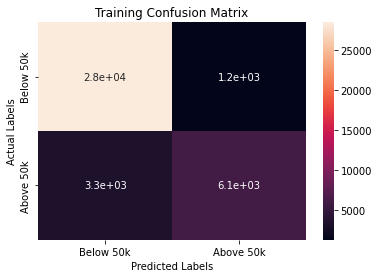

In [ ]:
# Train Dataset

labels = ['Below 50k', 'Above 50k']
cm = confusion_matrix(Y_train, rf_train_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Below 50k'), Text(0, 1.5, 'Above 50k')]

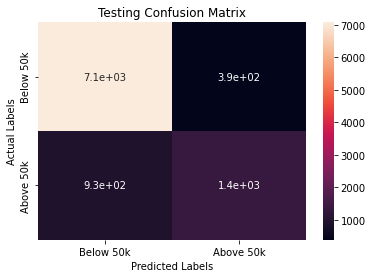

In [ ]:
# Test Dataset

labels = ['Below 50k', 'Above 50k']
cm = confusion_matrix(Y_test, rf_test_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

###**XG Boost Classifier**

In [ ]:
xgb = XGBClassifier()

In [ ]:
xgb.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
gamma = range(0,5)
learning_rate = [0.1, 0.01, 1]
max_delta_step = range(0, 6)
max_depth = range(3, 10)
min_child_weight = range(0, 7)
n_estimators = range(100, 1000, 200)
n_jobs = range(1, 5)
reg_alpha = range(0, 100, 20)
reg_lambda = range(1, 5)

xgboost_grid = {'gamma': gamma,
                'learning_rate': learning_rate,
                'max_delta_step': max_delta_step,
                'max_depth': max_depth,
                'min_child_weight': min_child_weight,
                'n_estimators': n_estimators,
                'n_jobs': n_jobs,
                'reg_alpha': reg_alpha,
                'reg_lambda': reg_lambda}

In [ ]:
xgb_random = RandomizedSearchCV(estimator=xgb, param_distributions = xgboost_grid, cv = 3, verbose=2, scoring='roc_auc')
xgb_random.fit(X_train,Y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END gamma=2, learning_rate=1, max_delta_step=4, max_depth=5, min_child_weight=4, n_estimators=500, n_jobs=3, reg_alpha=20, reg_lambda=2; total time=  38.9s
[CV] END gamma=2, learning_rate=1, max_delta_step=4, max_depth=5, min_child_weight=4, n_estimators=500, n_jobs=3, reg_alpha=20, reg_lambda=2; total time=  35.0s
[CV] END gamma=2, learning_rate=1, max_delta_step=4, max_depth=5, min_child_weight=4, n_estimators=500, n_jobs=3, reg_alpha=20, reg_lambda=2; total time=  38.5s
[CV] END gamma=2, learning_rate=1, max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=500, n_jobs=3, reg_alpha=80, reg_lambda=1; total time=  11.9s
[CV] END gamma=2, learning_rate=1, max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=500, n_jobs=3, reg_alpha=80, reg_lambda=1; total time=  12.0s
[CV] END gamma=2, learning_rate=1, max_delta_step=0, max_depth=6, min_child_weight=1, n_estimators=500, n_jobs=3, reg_alpha=80, reg_la

RandomizedSearchCV(cv=3, estimator=XGBClassifier(),
                   param_distributions={'gamma': range(0, 5),
                                        'learning_rate': [0.1, 0.01, 1],
                                        'max_delta_step': range(0, 6),
                                        'max_depth': range(3, 10),
                                        'min_child_weight': range(0, 7),
                                        'n_estimators': range(100, 1000, 200),
                                        'n_jobs': range(1, 5),
                                        'reg_alpha': range(0, 100, 20),
                                        'reg_lambda': range(1, 5)},
                   scoring='roc_auc', verbose=2)

In [ ]:
# Getting the best parameters after the Random Search Cross Validation

xgb_random.best_params_

{'reg_lambda': 2,
 'reg_alpha': 0,
 'n_jobs': 4,
 'n_estimators': 700,
 'min_child_weight': 0,
 'max_depth': 7,
 'max_delta_step': 3,
 'learning_rate': 0.1,
 'gamma': 2}

In [ ]:
xgb_best_parameters = xgb_random.best_params_

xgb_model = XGBClassifier(gamma = xgb_best_parameters['gamma'],
                        learning_rate = xgb_best_parameters['learning_rate'],
                        max_delta_step = xgb_best_parameters['max_delta_step'],
                        max_depth = xgb_best_parameters['max_depth'],
                        min_child_weight = xgb_best_parameters['min_child_weight'],
                        n_estimators = xgb_best_parameters['n_estimators'],
                        reg_alpha = xgb_best_parameters['reg_alpha'],
                        reg_lambda = xgb_best_parameters['reg_lambda'],
                        n_jobs = xgb_best_parameters['n_jobs'])

xgb_model.fit(X_train, Y_train)

XGBClassifier(gamma=2, max_delta_step=3, max_depth=7, min_child_weight=0,
              n_estimators=700, n_jobs=4, reg_lambda=2)

In [ ]:
xgb_train_preds = xgb_model.predict(X_train)
xgb_test_preds = xgb_model.predict(X_test)

In [ ]:
print(classification_report(xgb_train_preds, Y_train))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93     31207
           1       0.69      0.82      0.75      7866

    accuracy                           0.89     39073
   macro avg       0.82      0.86      0.84     39073
weighted avg       0.90      0.89      0.89     39073



In [ ]:
print(classification_report(xgb_test_preds, Y_test))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      7813
           1       0.66      0.78      0.71      1956

    accuracy                           0.87      9769
   macro avg       0.80      0.84      0.82      9769
weighted avg       0.88      0.87      0.88      9769



In [ ]:
results_df.loc[2,'model_name'] = 'XG Boost Classifier'
results_df.loc[2,'train_accuracy'] = round(accuracy_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_accuracy'] = round(accuracy_score(Y_test, xgb_test_preds),2)
results_df.loc[2,'train_recall'] = round(recall_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_recall'] = round(recall_score(Y_test, xgb_test_preds),2)
results_df.loc[2,'train_precision'] = round(precision_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_precision'] = round(precision_score(Y_test, xgb_test_preds),2)
results_df.loc[2,'train_ROC'] = round(roc_auc_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_ROC'] = round(roc_auc_score(Y_test, xgb_test_preds),2)
results_df.loc[2,'train_f1'] = round(f1_score(Y_train, xgb_train_preds),2)
results_df.loc[2,'test_f1'] = round(f1_score(Y_test, xgb_test_preds),2)

[Text(0, 0.5, 'Below 50k'), Text(0, 1.5, 'Above 50k')]

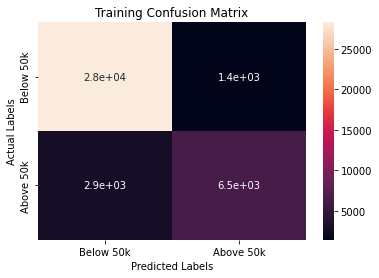

In [ ]:
# Training Dataset
labels = ['Below 50k', 'Above 50k']
cm = confusion_matrix(Y_train, xgb_train_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Training Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

[Text(0, 0.5, 'Below 50k'), Text(0, 1.5, 'Above 50k')]

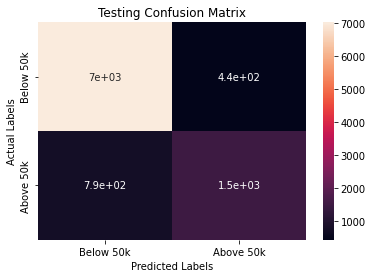

In [ ]:
# Plotting confusion matrix for the testing dataset

labels = ['Below 50k', 'Above 50k']
cm = confusion_matrix(Y_test, xgb_test_preds)

ax = plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)

ax.set_xlabel('Predicted Labels')
ax.set_ylabel('Actual Labels')
ax.set_title('Testing Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
results_df

,model_name,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_ROC,test_ROC,train_f1,test_f1
0,Random Forest Classifier,0.88,0.87,0.65,0.6,0.83,0.78,0.8,0.77,0.73,0.68
2,XG Boost Classifier,0.89,0.87,0.69,0.66,0.82,0.78,0.82,0.8,0.75,0.71
